In [1]:
# get price data (previous close price)
import requests
import json

with open('config.json', 'r') as file:
    config = json.load(file)

api_key = config['api_key']
url = 'https://api.polygon.io/v2/aggs/ticker/ETH/prev'

params = {
    'adjusted': 'true',
    'apiKey': api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    price = data['results'][0]['c']
    print(price)
else:
    print(f"Error: {response.status_code}")


2.33


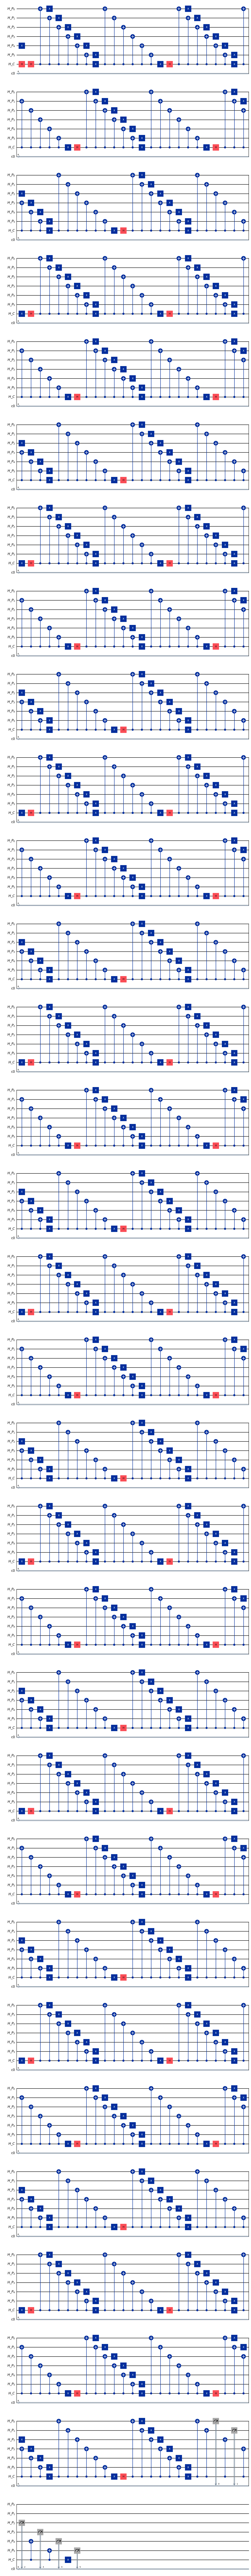

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np

def shift_right(circuit, position_register):
    """ Shift |j> to |j+1> """
    for i in range(len(position_register)):
        circuit.cx(coin_register[0], position_register[i]) # controlled shift
        circuit.x(position_register[i])

def shift_left(circuit, position_register):
    """ Shift |j> to |j-1> """
    circuit.x(coin_register[0])  # flip for opposite shift
    for i in range(len(position_register)):
        circuit.cx(coin_register[0], position_register[i]) # controlled shift
    circuit.x(coin_register[0])  # flip back

def step(circuit, position_register, coin_register):
    """ U = SC """
    # apply hadamard on coin
    circuit.h(coin_register[0])
    # apply controlled shift operators
    shift_right(circuit, position_register)
    shift_left(circuit, position_register)


n_position = 6  # size of position register: 2^6 = 64
n_coin = 1 # size of coin register: 1

n_steps = 50 # number of time steps: 50 days

position_register = QuantumRegister(n_position, name='H_P')
coin_register = QuantumRegister(n_coin, name='H_C')

circuit = QuantumCircuit(position_register, coin_register)

intial_position = price
binary_repr = format(int(intial_position), '0' + str(n_position) + 'b')
for i in range(n_position):
    if binary_repr[i] == '1':
        circuit.x(position_register[i])

# apply hadamard on coin
circuit.h(coin_register[0])

# quantum walk
for _ in range(n_steps):
    step(circuit, position_register, coin_register)

position_classical = ClassicalRegister(n_position)
circuit.add_register(position_classical)
circuit.measure(position_register, position_classical)

circuit.draw('mpl')



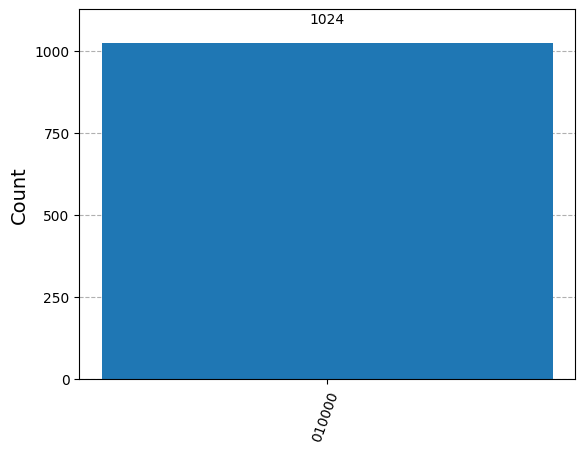

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)

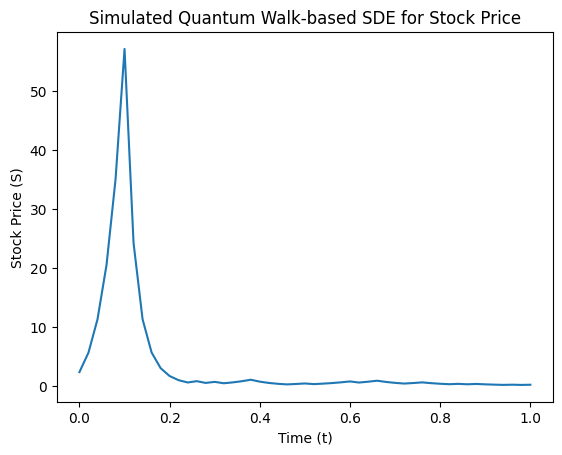

0.18268604669258873


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def dQ(t):
    # Random increment representing quantum walk (±1)
    return np.random.choice([-1, 1])

price = 2.33

# Parameters
mu = 0.05   # Drift coefficient
sigma = 0.2 # Volatility coefficient
S0 = price   # Initial stock price
T = 1       # Time horizon
N = 50    # Number of time steps
dt = T / N  # Time step size

# Time grid
t = np.linspace(0, T, N+1)
S = np.zeros(N+1)
S[0] = S0

# Simulating the SDE
for i in range(1, N+1):
    f_t = t[i] ** (-0.5)
    dS = mu * S[i-1] * dt + sigma * S[i-1] * max(f_t, np.finfo(float).eps) * dQ(t[i-1])
    S[i] = S[i-1] + dS

# Plot the result
plt.plot(t, S)
plt.xlabel('Time (t)')
plt.ylabel('Stock Price (S)')
plt.title('Simulated Quantum Walk-based SDE for Stock Price')
plt.show()

print(S[-1])
